# Titanic EDA

In [ ]:
#import panda libaray
import pandas as pd

#import dataset from local machine and print
data = pd.read_csv(r"F:\Data Analytics\Elevate Labs Internship\Task-5\Dataset\train.csv")
print(data)

In [28]:
# provide informtion about data table
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
# Statistical summary (numerical columns)

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# check any duplicate row in dataset
data["PassengerId"].duplicated().sum()

In [33]:
# total passangers are 891 but age count is only 714 since there are 177 passanger whom age is missing and assume 687 empty cabine

#count missing data
data.isnull().sum()

# percentage ratio of missing value
data.isnull().sum()/data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [40]:
import pandas as pd

# df is your DataFrame
missing_age_df = data[data['Age'].isna()]
print(missing_age_df)

     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

# Apply cleaning process to Age and Embarked columns

In [63]:
#fill 177 empty age cells with medium age value
data['Age'].fillna(data['Age'].median(), inplace=True)

#fill empty embarked cells with mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\ADMIN PC\AppData\Local\Temp\ipykernel_4040\253493696.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


# APPLY EDA ANALYSIS BASED ON CURRENT CONDITIONS

In [68]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


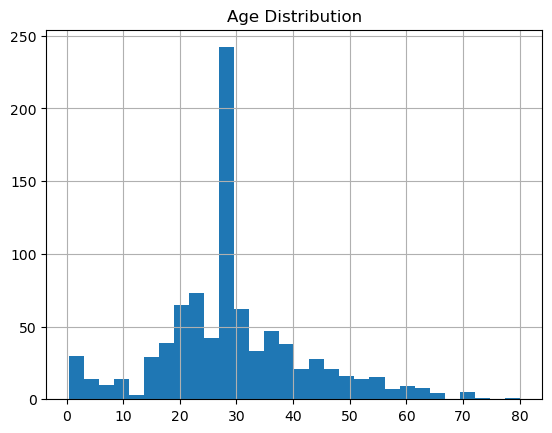

In [70]:
# import seaborn 
import seaborn as sns

# show age distribution according to travelling passenger
data['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.show()


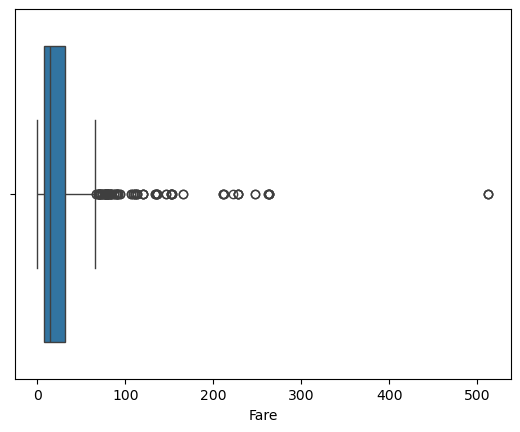

In [72]:
# splite of fare show outline in price from 0 to 520

sns.boxplot(x=data['Fare'])
plt.show()

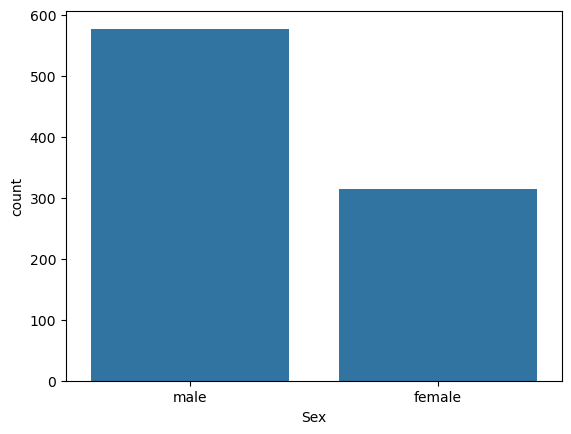

In [74]:
# passanger based on there gender

sns.countplot(x='Sex', data=data)
plt.show()

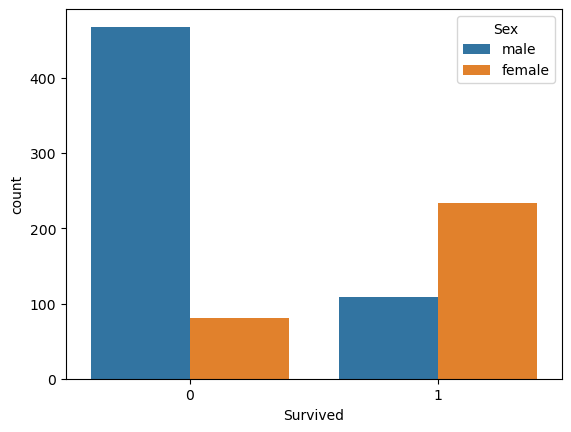

In [75]:
# Survivior based on gender

sns.countplot(x='Survived', hue='Sex', data=data)
plt.show()

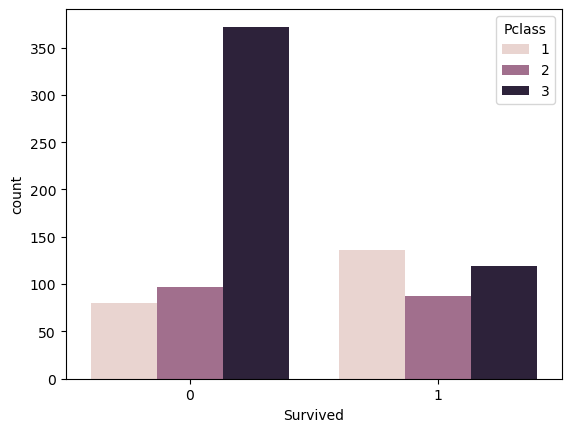

In [77]:
# Passenger survived based on there class level

sns.countplot(x='Survived', hue='Pclass', data=data)
plt.show()

In [ ]:
# extract cabin first letter
data['Cabin_Deck'] = data['Cabin'].str[0]

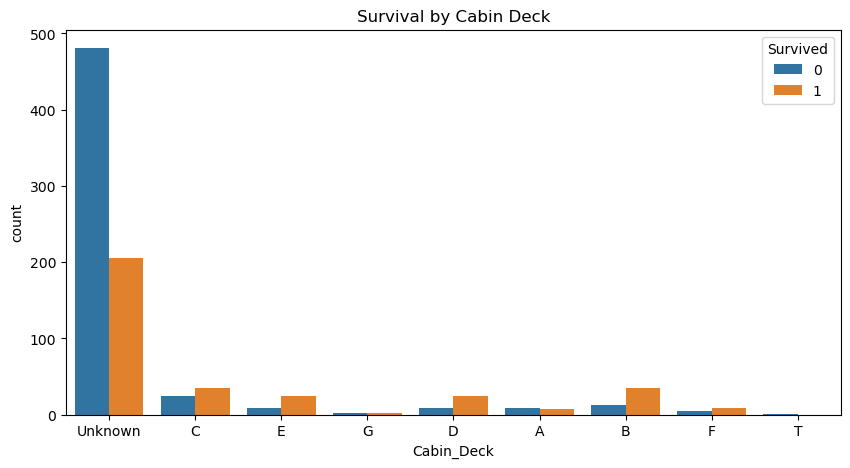

In [88]:
# fill empty cabin cells with "unknown"
data['Cabin_Deck'].fillna('Unknown', inplace=True)

# passenger count on each deck
data['Cabin_Deck'].value_counts()

# surival rate based on each deck count
data.groupby('Cabin_Deck')['Survived'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.countplot(x='Cabin_Deck', hue='Survived', data=data)
plt.title("Survival by Cabin Deck")
plt.show()


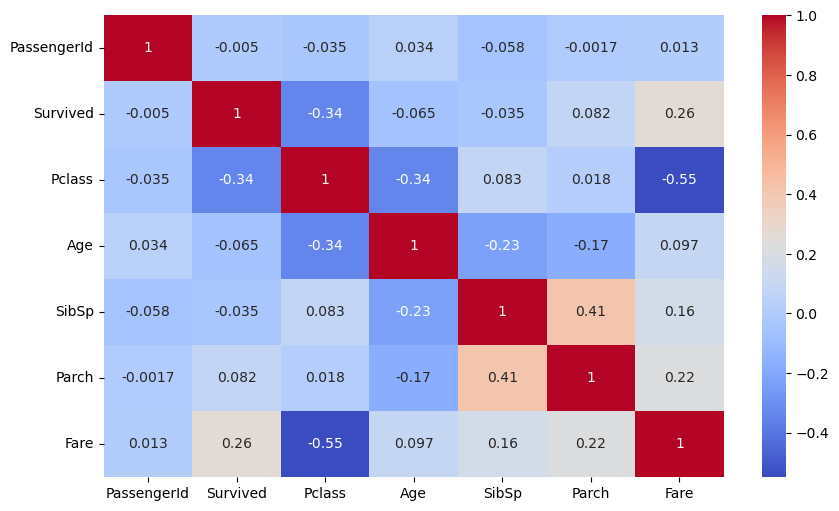

In [90]:
# multi-dimension heatmap

plt.figure(figsize=(10,6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


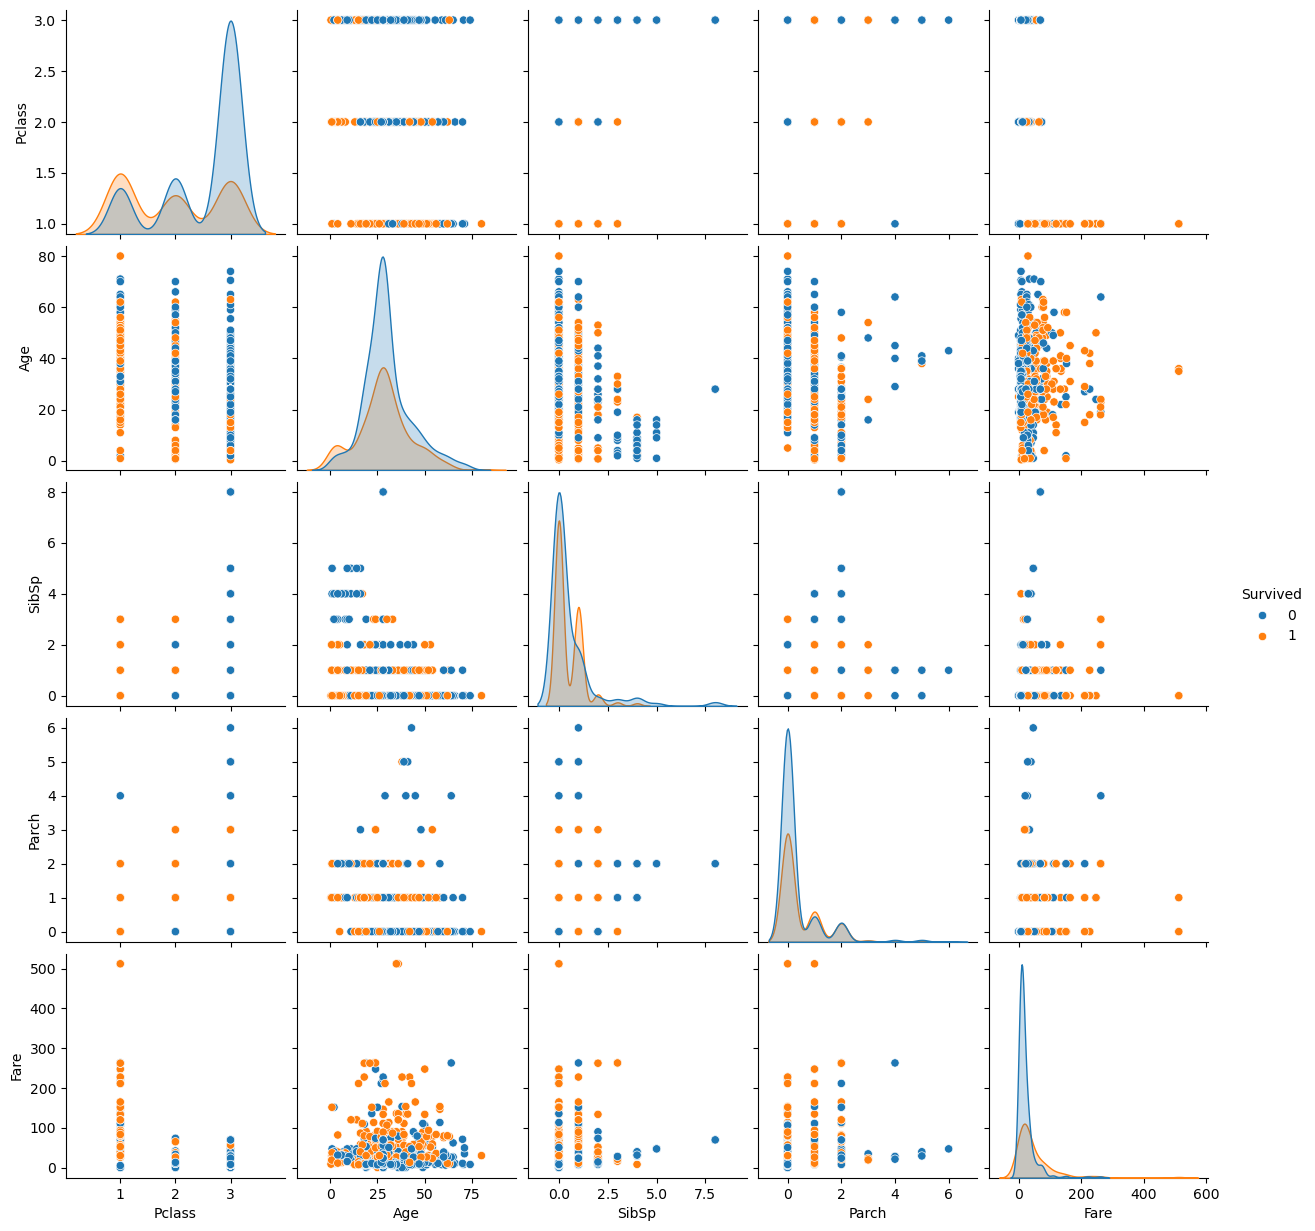

In [94]:
# pair plot 

cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(data[cols], hue='Survived')
plt.show()

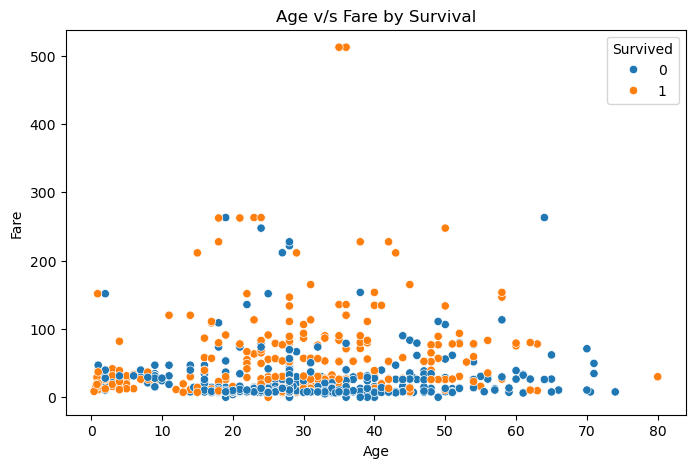

In [103]:
# Age v/s Fare by Survival

plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)

plt.title("Age v/s Fare by Survival")
plt.show()

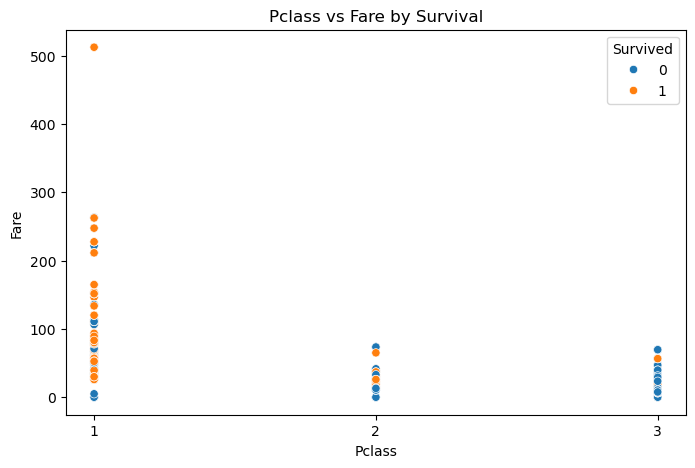

In [101]:
#

plt.figure(figsize=(8,5))
sns.scatterplot(x='Pclass', y='Fare', hue='Survived', data=data)
plt.xticks([1,2,3])

plt.title("Pclass vs Fare by Survival")
plt.show()